In [45]:
# reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task 1
1. Implement the model based on Chinese Restaurant Process as described
in the previous lecture. Set the hyperparameters α = 100, pc = 0.5,
pcont = 0.99, T = 1. (4 pts)

In [46]:
from crp import CRPTextSegmentation, logger
logger.setLevel(logging.WARNING)

In [47]:
# open data_small.txt
with open("data_small.txt", "r") as f:
    text = f.read()

crp = CRPTextSegmentation(alpha=100, p_cont=0.99, p_c=0.5, T=1)
results = crp.segmentation(text, numiter=300, output_file="output_{it}.txt")

100%|██████████| 300/300 [07:35<00:00,  1.52s/it, P=0.18, R=0.301, F=0.226] 


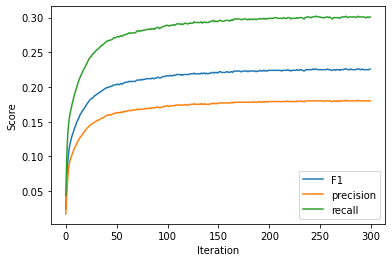

In [48]:
# plot f1 over iterations
import matplotlib.pyplot as plt
f1 = [r["f1"] for r in results]
plt.plot(f1, label="F1")
precision = [r["precision"] for r in results]
plt.plot(precision, label="precision")
recall = [r["recall"] for r in results]
plt.plot(recall, label="recall")

plt.xlabel("Iteration")
plt.ylabel("Score")
plt.legend()
plt.show()

# Task 2
Debug your code, check the output segmentation and try to change the
parameters to obtain better segmentations. Test also very high values of
parameter α (e.g. 10000) and parameter pc (e.g. 0.99). (2pts)

In [51]:
all_results = []
all_results.append(results)
# check the last output segmentation
results[-1]["segmentation"][:500]

'Tr i but es po ur edin from a round the world Thursda y tothe late Labo ur Party lead er J ohnS mith ,who di edearlie r from a mass ive he art at tack aged 55 .In Wash ingto n ,the US State De part ment issu eda state ment reg re tting "the un time ly death " ofthe ra pi er- ton gu ed Sco tti sh bar r ister and par liamen t ari an ."M r .S mith , throu g hou this dis t ing ui shed car e er in govern ment and in oppos ition , left a prof ound imp re ssion onthe his tory of his party and his count'

The segmentation is pretty good but it seems that the models converges on too short words.

In [52]:
os.makedirs("outputs", exist_ok=True)
for alpha in [1, 10, 1000, 10000]:
    crp = CRPTextSegmentation(alpha=alpha, p_cont=0.99, p_c=0.5, T=1)
    results = crp.segmentation(text, numiter=100, output_file="outputs/output_"+str(alpha)+"_{it}.txt")
    all_results.append(results)

100%|██████████| 100/100 [02:50<00:00,  1.71s/it, P=0.181, R=0.296, F=0.225]


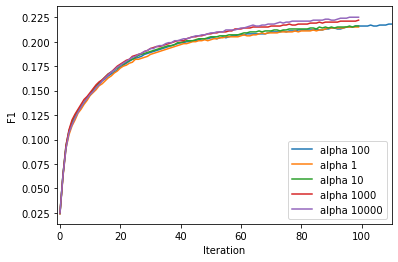

In [53]:
# plot f1 over iterations
for result in all_results:
    f1 = [r["f1"] for r in result]
    plt.plot(f1, label=f"alpha {result[0]['alpha']}")
    plt.xlabel("Iteration")
    plt.ylabel("F1")
plt.xlim(-1, 110)
plt.legend()
plt.show()

Higher alpha seems to help a bit, lets try higher values.

In [54]:
for alpha in [50000, 100000]:
    crp = CRPTextSegmentation(alpha=alpha, p_cont=0.99, p_c=0.5, T=1)
    results = crp.segmentation(text, numiter=100, output_file="outputs/output_"+str(alpha)+"_{it}.txt")
    all_results.append(results)

100%|██████████| 100/100 [02:54<00:00,  1.74s/it, P=0.177, R=0.277, F=0.216]


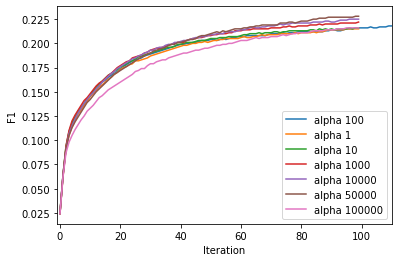

In [55]:
# plot f1 over iterations
for result in all_results:
    f1 = [r["f1"] for r in result]
    plt.plot(f1, label=f"alpha {result[0]['alpha']}")
    plt.xlabel("Iteration")
    plt.ylabel("F1")
plt.xlim(-1, 110)
plt.legend()
plt.show()

alpha = 50000 gives us the best F1 score so far. Lets see the segmentation.

In [60]:
assert all_results[5][0]["alpha"] == 50000
all_results[5][0]["segmentation"][:500]

'Tri b u t es pour e d in froma rou ndth e worl d T h ur s daytot h el a te L a b o u rP a rt y le a de rJo hn Smith ,w h o die d ea rli er f ro mam ass i vehe a r t a tt acka g ed 55. I nW a s hin gto n,th eUSS t a t e D e pa r t ment i s s ue d asta t ementr egr e t t ing"t heun t imel ydeat h" o fth era pi er-t o ng u e dSco t tis h b arr is te r an d pa r l iam en t a ria n ." Mr .Sm ith , t h r ou gho u thi sd ist inguish edc a r e ering o vernm en t a ndino ppos i t i on,lef ta p r o foun d'

We get really short words. Lets experiment with p_c.

In [61]:
for p_c in [0.1, 0.4, 0.6, 0.9]:
    crp = CRPTextSegmentation(alpha=50000, p_cont=0.99, p_c=p_c, T=1)
    results = crp.segmentation(text, numiter=100, output_file="outputs/output_"+str(p_c)+"_{it}.txt")
    all_results.append(results)

100%|██████████| 100/100 [03:03<00:00,  1.84s/it, P=0.186, R=0.288, F=0.226]


In [62]:
for p_c in [0.55, 0.65, 0.7, 0.75, 0.8, 0.85, 0.95]:
    crp = CRPTextSegmentation(alpha=50000, p_cont=0.99, p_c=p_c, T=1)
    results = crp.segmentation(text, numiter=100, output_file="outputs/output_"+str(p_c)+"_{it}.txt")
    all_results.append(results)

100%|██████████| 100/100 [03:06<00:00,  1.87s/it, P=0.185, R=0.288, F=0.226]


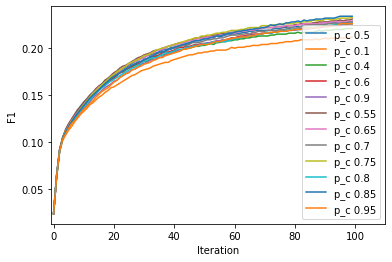

In [65]:
# plot f1 over iterations
for result in all_results:
    if result[0]['p_c'] == 0.5 and result[0]['alpha'] != 50000:
        continue
    f1 = [r["f1"] for r in result]
    plt.plot(f1, label=f"p_c {result[0]['p_c']}")
    plt.xlabel("Iteration")
    plt.ylabel("F1")
plt.xlim(-1, 110)
plt.legend()
plt.show()

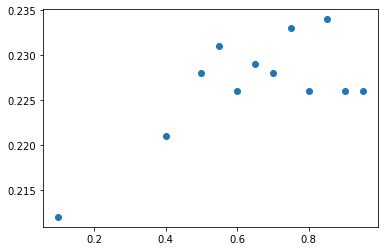

In [70]:
# plot barplot of f1 for the last iterations
f1s = []
p_cs = []
for result in all_results:
    if result[0]['p_c'] == 0.5 and result[0]['alpha'] != 50000:
        continue
    f1s.append(result[-1]["f1"])
    p_cs.append(result[0]["p_c"])
plt.plot(p_cs, f1s, "o")

In [78]:
# show segmentations
#assert all_results[10][0]["p_c"] == 0.7
print([(i, res[0]["p_c"],  res[-1]["f1"]) for i, res in enumerate(all_results)])
print("lowest p_c")
print(all_results[7][-1]["segmentation"][:500])
print("highest p_c")
print(all_results[17][-1]["segmentation"][:500])

[(0, 0.5, 0.226), (1, 0.5, 0.215), (2, 0.5, 0.216), (3, 0.5, 0.222), (4, 0.5, 0.225), (5, 0.5, 0.228), (6, 0.5, 0.216), (7, 0.1, 0.212), (8, 0.4, 0.221), (9, 0.6, 0.226), (10, 0.9, 0.226), (11, 0.55, 0.231), (12, 0.65, 0.229), (13, 0.7, 0.228), (14, 0.75, 0.233), (15, 0.8, 0.226), (16, 0.85, 0.234), (17, 0.95, 0.226)]
lowest p_c
T rib utes po ur edin from around the world Thu rsday tothe late La bour Part y leader John S mith ,who died earlie r from amas sive hear t attac ka ged 55 .I nWas hingt on ,the US State De part ment issu eda state ment re gre t ting "the un time lyde ath " ofthe rapi er- ton gu ed Sco t tish b arri ster and parli am ent a rian ."M r . Smi th , throug hout his dis ting u ished car e er ing over n men tandin oppo sition , left a pro f ound im press ion onthe his tory of his party and his countr y
highest p_c
Trib ute sp our edin from aroun dthewor ld Thursday tothe late La bour Party leader John Smith ,who died e arlier fr omam a ssive hear t attac ka ged 55. I 

The change is not so visible in the segmentation.

# Task 3
Download the gold data and the evaluation script. What precision and recall you get?

For the initial parameters we get a precision of 0.18 and a recall of 0.30 after 300 iterations.

# Task 4
Try to do annealing and run the model for different temperatures. Try
to change also the temperature during the sampling. E.g., start with a
higher temperature and then gradually decrease it to zero. (2pts)

In [43]:
all_results_T = []
for T in [0.1, 0.5, 0.75, 1, 2, 3, 5, 10]:
    crp = CRPTextSegmentation(alpha=100, p_cont=0.99, p_c=0.5, T=T)
    results = crp.segmentation(text, numiter=20, output_file="outputs/output_"+str(p_c)+"_{it}.txt")
    all_results_T.append(results)

100%|██████████| 20/20 [01:18<00:00,  3.91s/it, P=0.022, R=0.062, F=0.033]


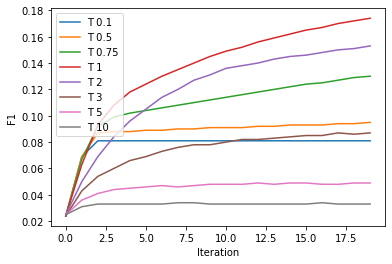

In [44]:
# plot f1 over iterations
for result in all_results_T:
    f1 = [r["f1"] for r in result]
    plt.plot(f1, label=f"T {result[0]['T']}")
    plt.xlabel("Iteration")
    plt.ylabel("F1")
plt.legend()
plt.show()

In [ ]:
def pre_step_callback(crp, it, result):
    # exponential decay
    crp.T = crp.T * 0.9
    result["T"] = crp.T